## Hierarchichal clustering for Heart Disease data set

### Import libraries ...

In [57]:
%matplotlib inline

import pandas as pnd
import numpy as nmp
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

import scipy
import scipy.cluster.hierarchy as sch
import collections

sns.set_style('whitegrid')

## Clustering patient by goal (more/less than 50% vessel narrowing) according to age, sex, chest pain type, etc

In [58]:
df_clv = pnd.read_csv('C:\\Users\\hbenamor\\Desktop\\uc-heartdisease-datafolder\\processed.cleveland.data', header = None)
df_hds = df_clv
# rename columns since the file does not contain names.
df_hds.columns=["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "goal"]
print(df_hds.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'goal'],
      dtype='object')


In [59]:
# Some 'goal' values exceed 1 whereas they ar assumed to be either 0 or 1. They are set back to 1.
# 'thal' and 'ca' have bad values '?'. They are set to default "no issue" values for each.
df_hds["goal"] = nmp.where(df_hds['goal'] >= 1, 1, df_hds['goal']) 
df_hds["ca"] = nmp.where(df_hds['ca']=='?', '0.0', df_hds['ca'])
df_hds["thal"] = nmp.where(df_hds['thal']=='?', '3.0', df_hds['thal'])

In [60]:
# the 2 variables 'thal and 'ca' are categorical and need to be transformed into numeric.
df_hds["thal"] = pnd.to_numeric(df_hds['thal'])
df_hds["ca"] = pnd.to_numeric(df_hds['ca'])

In [61]:
df_hds.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [62]:
df_hds.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,goal
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0


## Feature negineering

In [63]:
# simulate age groups
#df_hds["age"] = nmp.where((df_hds[df_hds['age']>= 60]) & (df_hds[df_hds['age']< 70]), '60.0', 'df_hds['age']')
df_hds["age"] = nmp.where((df_hds['age']>= 20) & (df_hds['age']< 30), 20.0, df_hds['age'])
df_hds["age"] = nmp.where((df_hds['age']>= 30) & (df_hds['age']< 40), 30.0, df_hds['age'])
df_hds["age"] = nmp.where((df_hds['age']>= 40) & (df_hds['age']< 50), 40.0, df_hds['age'])
df_hds["age"] = nmp.where((df_hds['age']>= 50) & (df_hds['age']< 60), 50.0, df_hds['age'])
df_hds["age"] = nmp.where((df_hds['age']>= 60) & (df_hds['age']< 70), 60.0, df_hds['age'])
df_hds["age"] = nmp.where((df_hds['age']>= 70) & (df_hds['age']< 80), 70.0, df_hds['age'])
df_hds["age"] = nmp.where((df_hds['age']>= 80) & (df_hds['age']< 150), 80.0, df_hds['age'])
# select the columns
#X_columns = df.columns[2:]
X_columns = ['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# normalize the data
for col in X_columns:
    df_hds[col] = StandardScaler().fit_transform(df_hds[col].values.reshape(-1, 1))

## Model training - 

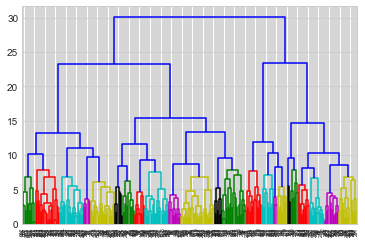

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
Counter({10: 53, 2: 50, 5: 41, 1: 34, 4: 31, 6: 29, 8: 23, 3: 18, 7: 14, 9: 10})


In [64]:
k = 10
color_threshold = 8.
d = sch.distance.pdist(df_hds[X_columns])
Z= sch.linkage(d, method = 'ward')
T = sch.fcluster(Z, k, 'maxclust')
P = sch.dendrogram(Z, color_threshold=color_threshold)
plt.show()
print(set(T))
print(collections.Counter(T))
df_results = df_hds.copy()
df_results['cluster'] = T

In [65]:
# Analyze the results
for cluster in set(T):
    print((cluster), (len(df_results[df_results['cluster']==cluster]['age'])))
    print(sorted(list(df_results[df_results['cluster']==cluster]['age'])))

1 34
[30.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 70.0, 70.0]
2 50
[30.0, 30.0, 30.0, 30.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 70.0, 70.0, 70.0]
3 18
[40.0, 40.0, 40.0, 50.0, 50.0, 50.0, 50.0, 50.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 70.0]
4 31
[30.0, 30.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0]
5 41
[30.0, 30.0, 30.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 50.0, 50.0, 50.0

In [66]:
# select the columns: remove 'sex', not really pertinent
#X_columns = df.columns[2:]
X_columns = ['cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# normalize the data
for col in X_columns:
    df_hds[col] = StandardScaler().fit_transform(df_hds[col].values.reshape(-1, 1))

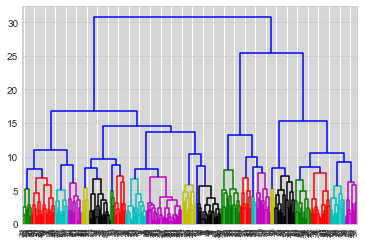

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
Counter({4: 51, 3: 40, 5: 35, 9: 32, 1: 30, 7: 27, 2: 24, 10: 24, 8: 22, 6: 18})


In [67]:
k = 10
color_threshold = 8.
d = sch.distance.pdist(df_hds[X_columns])
Z= sch.linkage(d, method = 'ward')
T = sch.fcluster(Z, k, 'maxclust')
P = sch.dendrogram(Z, color_threshold=color_threshold)
plt.show()
print(set(T))
print(collections.Counter(T))
df_results = df_hds.copy()
df_results['cluster'] = T

In [68]:
# Analyze the results
for cluster in set(T):
    print((cluster), (len(df_results[df_results['cluster']==cluster]['age'])))
    print(sorted(list(df_results[df_results['cluster']==cluster]['age'])))

1 30
[30.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0]
2 24
[40.0, 40.0, 40.0, 40.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 70.0, 70.0]
3 40
[20.0, 30.0, 30.0, 30.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 70.0, 70.0]
4 51
[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 60.0, 60.0, 60.0, 60.0, 60.0, 70.0]
5 35
[30.0, 30.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 50.0, 50.0

In [69]:
# select the columns: remove 'sex', not really pertinent; remove blood sugar
#X_columns = df.columns[2:]
X_columns = ['cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# normalize the data
for col in X_columns:
    df_hds[col] = StandardScaler().fit_transform(df_hds[col].values.reshape(-1, 1))

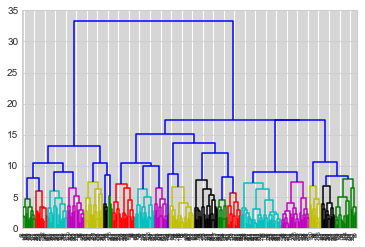

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
Counter({8: 62, 1: 57, 10: 32, 4: 30, 2: 25, 5: 24, 6: 21, 7: 21, 3: 20, 9: 11})


In [70]:
k = 10
color_threshold = 8.
d = sch.distance.pdist(df_hds[X_columns])
Z= sch.linkage(d, method = 'ward')
T = sch.fcluster(Z, k, 'maxclust')
P = sch.dendrogram(Z, color_threshold=color_threshold)
plt.show()
print(set(T))
print(collections.Counter(T))
df_results = df_hds.copy()
df_results['cluster'] = T

In [71]:
# Analyze the results
for cluster in set(T):
    print((cluster), (len(df_results[df_results['cluster']==cluster]['age'])))
    print(sorted(list(df_results[df_results['cluster']==cluster]['age'])))

1 57
[30.0, 30.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 70.0, 70.0]
2 25
[40.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 70.0]
3 20
[30.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 60.0, 60.0, 60.0, 60.0]
4 30
[40.0, 40.0, 40.0, 40.0, 40.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 70.0]
5 24
[30.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 70.0]
6 21
[40.0, 40.0, 40.0, 50.0, 50.0

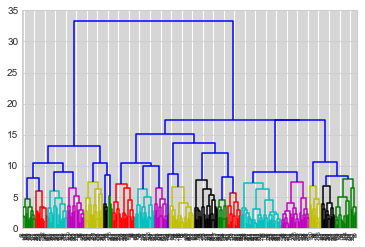

{1, 2, 3, 4, 5}
Counter({1: 82, 3: 66, 4: 62, 2: 50, 5: 43})


In [72]:
#less clusters
k = 5
color_threshold = 8.
d = sch.distance.pdist(df_hds[X_columns])
Z= sch.linkage(d, method = 'ward')
T = sch.fcluster(Z, k, 'maxclust')
P = sch.dendrogram(Z, color_threshold=color_threshold)
plt.show()
print(set(T))
print(collections.Counter(T))
df_results = df_hds.copy()
df_results['cluster'] = T

In [73]:
# Analyze the results
for cluster in set(T):
    print((cluster), (len(df_results[df_results['cluster']==cluster]['age'])))
    print(sorted(list(df_results[df_results['cluster']==cluster]['age'])))

1 82
[30.0, 30.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 70.0, 70.0, 70.0]
2 50
[30.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 70.0]
3 66
[30.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0

In [74]:
# select the columns: remove 'sex', not really pertinent; remove blood sugar
# keep only variables that appeared as most significant in previous analysis: 
#X_columns = df.columns[2:]
X_columns = ['cp', 'chol', 'exang', 'oldpeak', 'ca', 'thal']

# normalize the data
for col in X_columns:
    df_hds[col] = StandardScaler().fit_transform(df_hds[col].values.reshape(-1, 1))

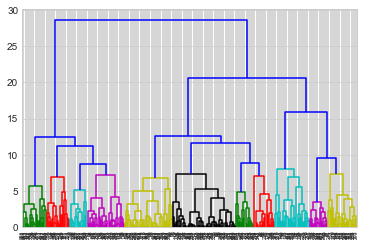

{1, 2, 3, 4, 5}
Counter({1: 93, 3: 93, 5: 43, 2: 43, 4: 31})


In [75]:
#less clusters
k = 5
color_threshold = 8.
d = sch.distance.pdist(df_hds[X_columns])
Z= sch.linkage(d, method = 'ward')
T = sch.fcluster(Z, k, 'maxclust')
P = sch.dendrogram(Z, color_threshold=color_threshold)
plt.show()
print(set(T))
print(collections.Counter(T))
df_results = df_hds.copy()
df_results['cluster'] = T

In [76]:
# Analyze the results
for cluster in set(T):
    print((cluster), (len(df_results[df_results['cluster']==cluster]['age'])))
    print(sorted(list(df_results[df_results['cluster']==cluster]['age'])))

1 93
[30.0, 30.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 70.0, 70.0, 70.0]
2 43
[20.0, 30.0, 30.0, 30.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 70.0, 70.0]
3 93
[30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 30.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0

Comments and analysis TBC ...

SKlearn analysis TBC ...